In [10]:
#1.import the dataset and reformat it 
import json
import numpy as np
from pandas import DataFrame, Series
from collections import Counter
#import the data text 
path = 'data.txt'
#get the sequence of the dataset
records = [json.loads(line) for line in open(path)]


In [11]:
#2. Counting time zones (in python)
# find the most often-occurring time zones in the data set if exist
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
# counts by each time zone
counts = Counter(time_zones)

<AxesSubplot:ylabel='tz'>

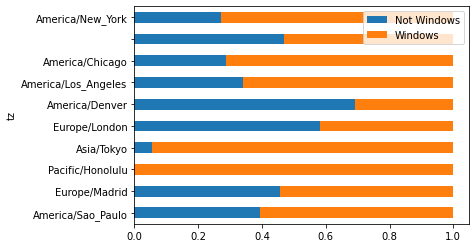

In [12]:
#3. Creating the dataframe (in Pandas)
frame = DataFrame(records)
#replace missing string by 'unknown'
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
#make summary of user behavior
results = Series([x.split()[0] for x in frame.a.dropna()])
#excluded the report with missing info
cframe = frame[frame.a.notnull()]
#decompose the top time zones into Windows and non- Windows users
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')
#group the data by its time zone column
by_tz_os = cframe.groupby(['tz', operating_system])
#count by groups
agg_counts = by_tz_os.size().unstack().fillna(0)
indexer = agg_counts.sum(1).argsort()
#sort the top 10 
count_subset = agg_counts.take(indexer)[-10:]
#convert to percentage
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)
